<a href="https://colab.research.google.com/github/manojkumar22092003/DECISION-TREE-1/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import balanced_accuracy_score

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [ ]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.notnull().sum()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

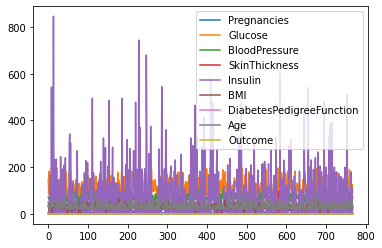

In [ ]:
df.plot()

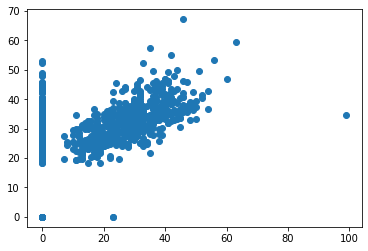

In [ ]:
x =df.SkinThickness
y = df.BMI
plt.scatter(x,y)

([<matplotlib.patches.Wedge at 0x7f4ffffcfaf0>,
 [Text(1.0999732685036896, 0.007668675068764998, ''),
  Text(1.0997861322749352, 0.0216901649541684, ''),
  Text(1.099642492346013, 0.028042628747114808, ''),
  Text(1.0995024805323268, 0.033080134571380385, ''),
  Text(1.0990469432250567, 0.045780089423885145, ''),
  Text(1.0987010779525852, 0.053441007717176824, ''),
  Text(1.098338127483349, 0.06044301213846803, ''),
  Text(1.0979305538062316, 0.0674425608851103, ''),
  Text(1.0972819377582517, 0.07728097482237548, ''),
  Text(1.096545162731704, 0.08711317977034758, ''),
  Text(1.096545162731704, 0.08711317977034758, ''),
  Text(1.096545162731704, 0.08711317977034758, ''),
  Text(1.096545162731704, 0.08711317977034758, ''),
  Text(1.0961345630791366, 0.09213587587530882, ''),
  Text(1.0953254150361977, 0.10130269086150438, ''),
  Text(1.0949341845459992, 0.10544729258064389, ''),
  Text(1.0938990370355874, 0.11569311462924163, ''),
  Text(1.0927680165975373, 0.1259287969508339, ''),
  

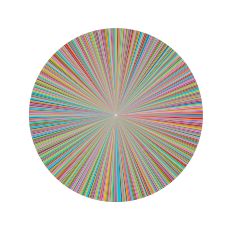

In [ ]:
x = df.SkinThickness
plt.pie(x)

<ipython-input-31-af6b1fb33ea5>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(x,y)


<StemContainer object of 3 artists>

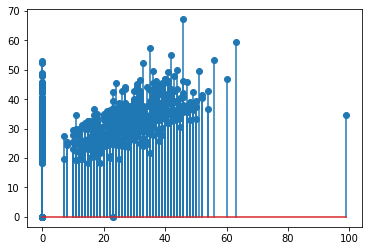

In [ ]:
x =df.SkinThickness
y = df.BMI
plt.stem(x,y)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4fffdd6040>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4fffd96970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4fffdb0700>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4fffd30c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4fffd0fd60>],
 'means': []}

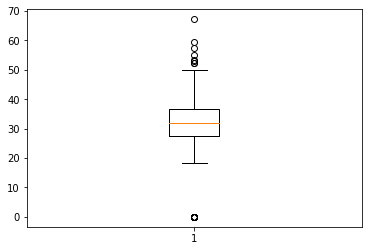

In [ ]:

y = df.BMI
plt.boxplot(y)

In [ ]:
 x = df.drop('Outcome', axis = 1)
 y = df['Outcome']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

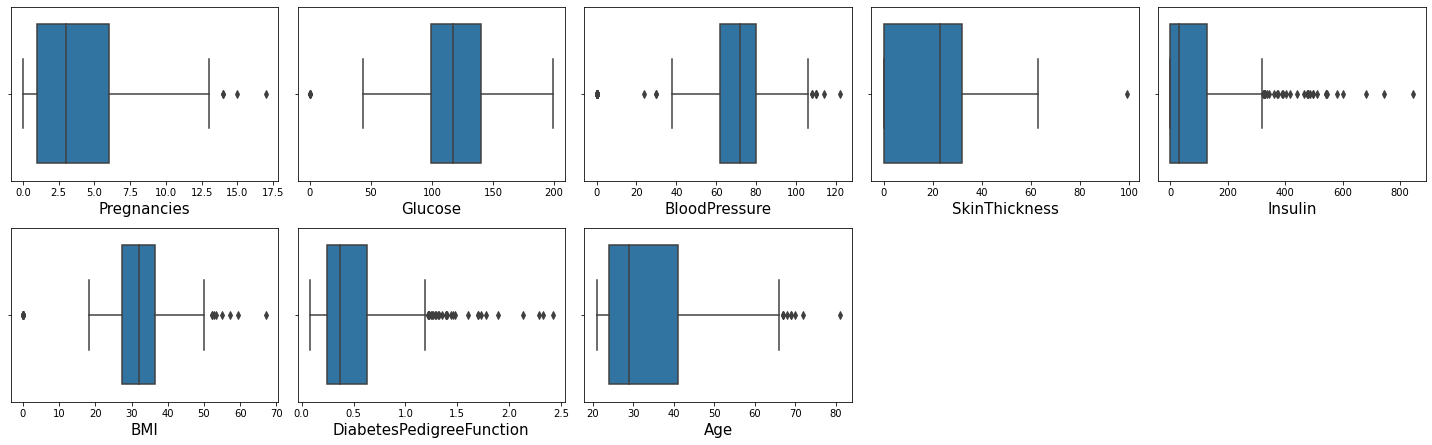

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for col in x.columns:
  if plotnumber <= 24:
    ax =  plt.subplot(5,5,plotnumber)
    sns.boxplot(x[col])
    plt.xlabel(col, fontsize = 15)
  plotnumber += 1
plt.tight_layout()
plt.show()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

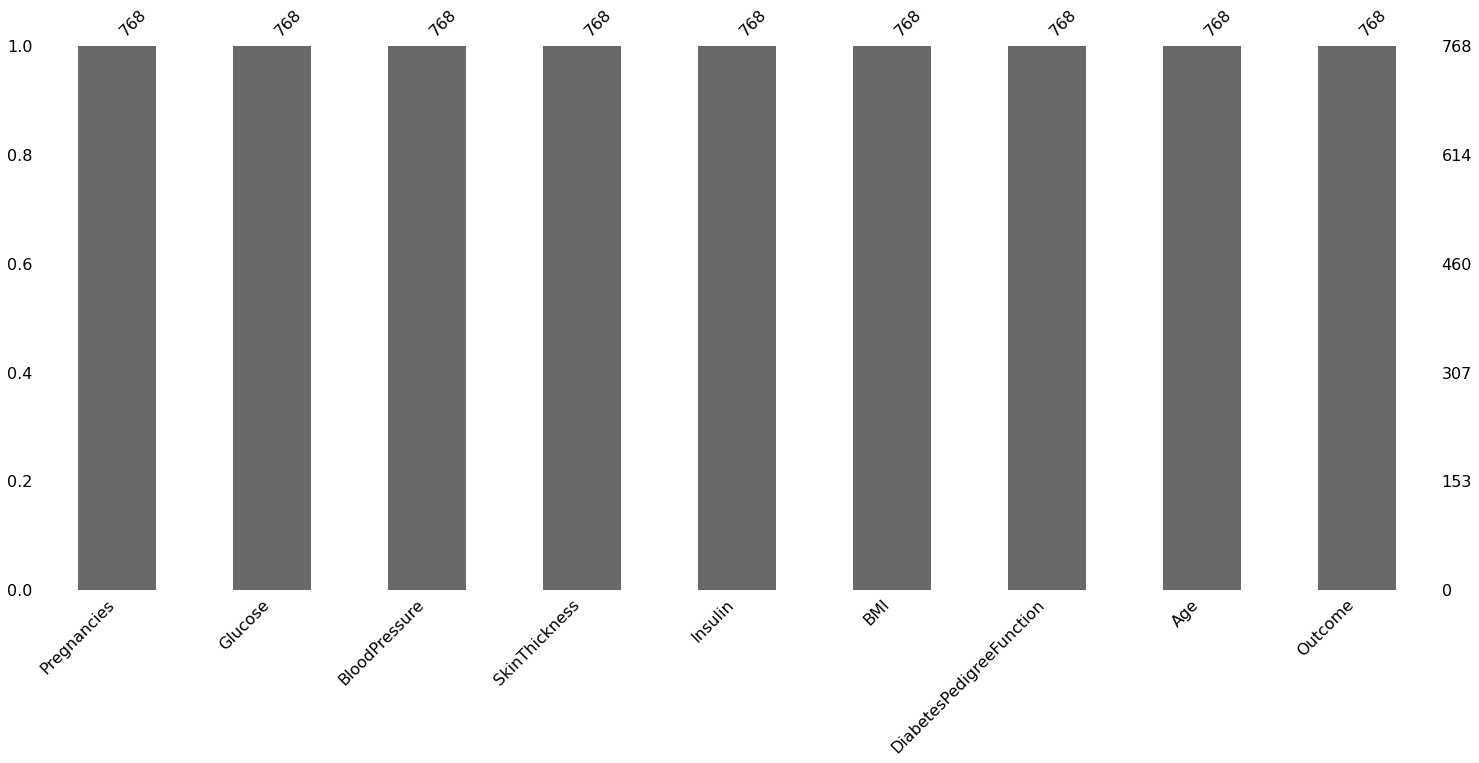

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.5, random_state=0)

In [ ]:
a = StandardScaler()
x_train = a.fit_transform(x_train)
x_test = a.transform(x_test)

In [ ]:
clf = DecisionTreeClassifier(criterion = "entropy",random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[198,  55],
       [ 57,  74]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.7083333333333334

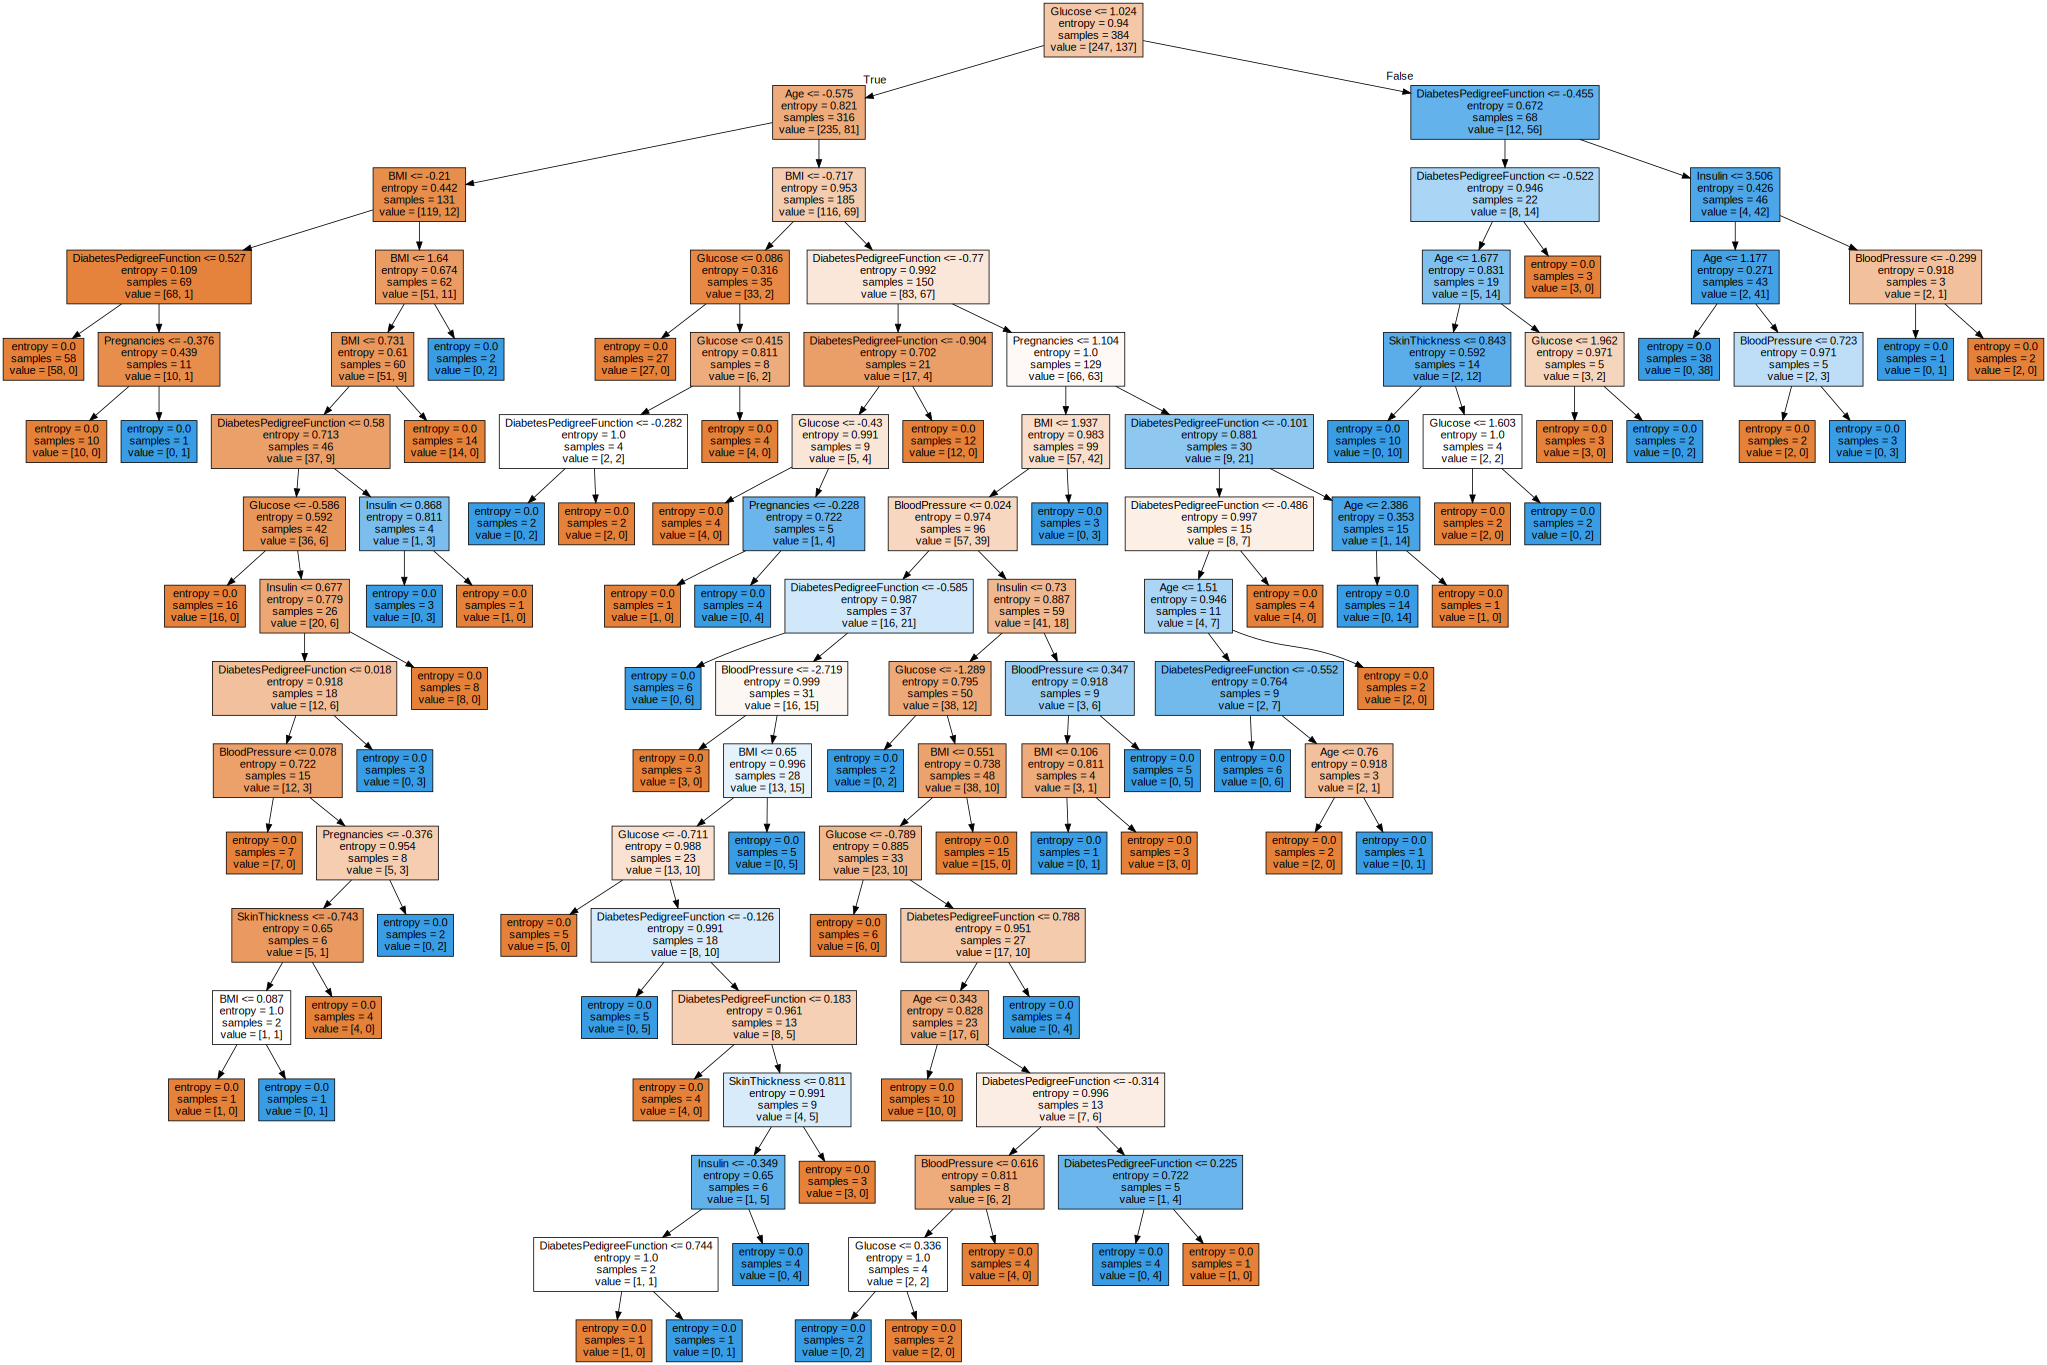

In [ ]:
graphviz.Source(export_graphviz(clf,feature_names = x.columns,filled = True))